In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [57]:
train_dir = '/content/drive/MyDrive/Training Data/Training_resized'
test_dir = '/content/drive/MyDrive/Training Data/Validation_resized'

In [58]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['LeafBlast', 'Healthy', 'BrownSpot', 'Hispa']
4


In [59]:


from PIL import Image

# Load the image
image_path = "/content/drive/MyDrive/Training Data/Training_resized/BrownSpot/IMG_20190420_190157.jpg"
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Display the image
image.show()

# Print the dimensions
print(f"Image dimensions: Width = {width}, Height = {height}")


Image dimensions: Width = 224, Height = 224


In [60]:
N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [61]:
dataset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
        t+=1
    count=count+1

In [62]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
        t+=1
    count=count+1

In [63]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [64]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [65]:
data=np.array(data)
test=np.array(test)

In [66]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [67]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1373, 224, 224, 3)
(344, 224, 224, 3)
(1373, 4)
(344, 4)


In [68]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                             rotation_range=20,zoom_range=0.2,
                             width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.1,fill_mode="nearest")

In [69]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),
                            include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

In [70]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [96]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.417223 to fit



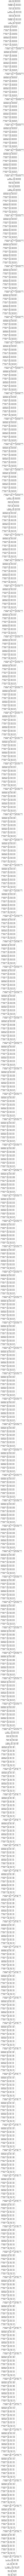

In [97]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_model.png', show_shapes=True)

In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
43/43 [==============================] - 545s 12s/step - loss: 1.0696 - accuracy: 0.5776 - val_loss: 0.8598 - val_accuracy: 0.6424
Epoch 2/20
43/43 [==============================] - 529s 12s/step - loss: 0.8804 - accuracy: 0.6446 - val_loss: 1.1255 - val_accuracy: 0.5378
Epoch 3/20
43/43 [==============================] - 527s 12s/step - loss: 0.8190 - accuracy: 0.6854 - val_loss: 0.8174 - val_accuracy: 0.6831
Epoch 4/20
43/43 [==============================] - 476s 11s/step - loss: 0.7796 - accuracy: 0.7007 - val_loss: 0.7535 - val_accuracy: 0.7093
Epoch 5/20
43/43 [==============================] - 515s 12s/step - loss: 0.7411 - accuracy: 0.7058 - val_loss: 0.7853 - val_accuracy: 0.7035
Epoch 6/20
43/43 [==============================] - 486s 11s/step - loss: 0.7363 - accuracy: 0.6977 - val_loss: 0.8664 - val_accuracy: 0.6599
Epoch 7/20
43/43 [==============================] - 537s 13s/step - loss: 0.7201 - accuracy: 0.7087 - val_loss: 0.7229 - val_accuracy: 0.7064
Epoch 

In [73]:
y_pred=model.predict(testx)
y_pred2=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,y_pred2,target_names=Name,digits=4))

11/11 [==============================] - 98s 8s/step
              precision    recall  f1-score   support

   LeafBlast     0.6860    0.7830    0.7313       106
     Healthy     0.8029    0.8029    0.8029       137
   BrownSpot     0.8158    0.8267    0.8212        75
       Hispa     0.2000    0.0769    0.1111        26

    accuracy                         0.7471       344
   macro avg     0.6262    0.6224    0.6166       344
weighted avg     0.7241    0.7471    0.7325       344



In [74]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

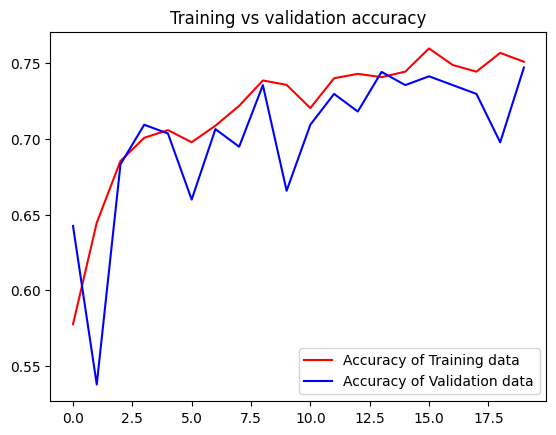

<Figure size 640x480 with 0 Axes>

In [75]:
epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

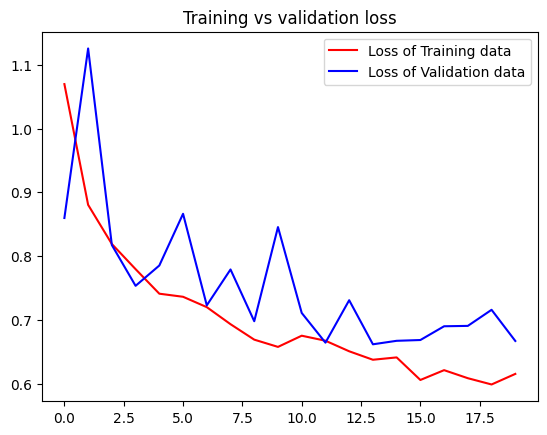

<Figure size 640x480 with 0 Axes>

In [76]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [92]:
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained DenseNet model
image_path='/content/Resized_final (3).jpg'
img = load_img(image_path, target_size=(224, 224))
img = img_to_array(img)
img = img.reshape((1, *img.shape))

In [93]:
predictions = model.predict(img)


1/1 [==============================] - 1s 709ms/step


In [94]:
# Get the class label with the highest probability
class_index = np.argmax(predictions)

# You can use a mapping of class indices to class labels
class_labels = ['Leaf Blast','Healthy','Brown Spot','Hispa']  # Replace with your actual class labels


# Get the corresponding class label
predicted_class = class_labels[class_index]

print(f"Predicted Class: {predicted_class}")

Predicted Class: Healthy


In [95]:
print(class_index)

1


In [81]:
predictions

array([[1.9526224e-04, 9.7218555e-01, 2.7619183e-02, 4.5117975e-08]],
      dtype=float32)

In [82]:
y_pred2=np.argmax(predictions,axis=1)

In [83]:
y_pred2

array([1])